### 1. 测试预测准确度
现在已经有一个预测模型，但是如何测试预测模型的准确度呢。
machine learning model is a function that returns the prediction
一般的情况是，
我们将数据集分为2部分，
+ 训练集： 包含绝大部分训练数据(75%)
+ 测试集： 包含剩下部分(25%)
然后将测试集的用测试集的数据计算出预测价格，与实际价格对比，判断准确度。
train/test validation -> 

In [31]:
# 1 准备测试集和训练集
import pandas as pd 
import numpy as np

dc_listing  = pd.read_csv('dc_airbnb.csv')
dc_listing.price = dc_listing.price.str.replace('$', '').str.replace(',', '').astype(float)

train_df = dc_listing.iloc[:2792]
test_df = dc_listing.iloc[2792:]

def make_prediction(new_listing):
    df = train_df.copy()
    df['distance'] = df.accommodates.map(lambda x: np.abs(x - new_listing))
    df = df.sort_values(by=['distance'], ascending=True)
    nearest_neighbor_prices = df[df.distance==0].price.mean().round(2)
    return nearest_neighbor_prices

test_df['predicted_price'] = test_df.accommodates.apply(make_prediction)                                                  
test_df[['price', 'predicted_price']].head()

/home/python/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,predicted_price
2792,120.0,109.92
2793,140.0,154.89
2794,299.0,163.82
2795,85.0,154.89
2796,175.0,238.99


### 2. 计算平均绝对误差
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>M</mi>
  <mi>A</mi>
  <mi>E</mi>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>k</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <mo fence="false" stretchy="false">&#x007C;<!-- | --></mo>
  <mo stretchy="false">(</mo>
  <mi>a</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>u</mi>
  <mi>a</mi>
  <msub>
    <mi>l</mi>
    <mn>1</mn>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>p</mi>
  <mi>r</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>e</mi>
  <msub>
    <mi>d</mi>
    <mn>1</mn>
  </msub>
  <mo stretchy="false">)</mo>
  <mo fence="false" stretchy="false">&#x007C;<!-- | --></mo>
  <mo>+</mo>
  <mo>&#x22EF;<!-- ⋯ --></mo>
  <mo>+</mo>
  <mo fence="false" stretchy="false">&#x007C;<!-- | --></mo>
  <mo stretchy="false">(</mo>
  <mi>a</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>u</mi>
  <mi>a</mi>
  <msub>
    <mi>l</mi>
    <mi>n</mi>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>p</mi>
  <mi>r</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>e</mi>
  <msub>
    <mi>d</mi>
    <mi>n</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo fence="false" stretchy="false">&#x007C;<!-- | --></mo>
</math>


In [32]:
test_df['error'] = np.absolute(test_df.predicted_price -test_df.price)
test_df.error.mean().round(2)

/home/python/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


56.97

### 3. 计算方差 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>M</mi>
  <mi>S</mi>
  <mi>E</mi>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>k</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <mo stretchy="false">(</mo>
  <mi>a</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>u</mi>
  <mi>a</mi>
  <msub>
    <mi>l</mi>
    <mn>1</mn>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>p</mi>
  <mi>r</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>e</mi>
  <msub>
    <mi>d</mi>
    <mn>1</mn>
  </msub>
  <msup>
    <mo stretchy="false">)</mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
  <mo>+</mo>
  <mo>&#x22EF;<!-- ⋯ --></mo>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mi>a</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>u</mi>
  <mi>a</mi>
  <msub>
    <mi>l</mi>
    <mi>n</mi>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>p</mi>
  <mi>r</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>c</mi>
  <mi>t</mi>
  <mi>e</mi>
  <msub>
    <mi>d</mi>
    <mi>n</mi>
  </msub>
  <msup>
    <mo stretchy="false">)</mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
</math>

In [39]:
import math 
test_df['squared_error'] = np.square(test_df.predicted_price - test_df.price)
# test_df['squared_error'] = (test_df.predicted_price - test_df.price)**2

test_df.squared_error.mean().round(2)

/home/python/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


17910.29

In [40]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
print(mse)

/home/python/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


18405.44408163265


/home/python/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### 5. Root Mean Squared Error 均方根差

均方根差 特别大，我们应该提升我们的模型，让均方根差越小越好
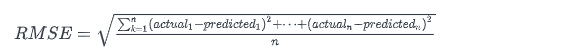
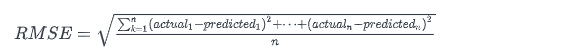

In [43]:
rmse = np.sqrt(mse).round(2)

rmse

135.67

### 6. 对比MSE和RMSE


In [54]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = errors_one.mean()
mae_two = errors_two.mean()
rmae_one = np.sqrt(errors_one.map(lambda x: np.square(x-0)).mean())
rmae_two = np.sqrt(errors_two.map(lambda x: np.square(x-0)).mean())
print(mae_one, rmae_one)
print(mae_two, rmae_two)

7.5 7.905694150420948
62.5 235.82302686548658
